## Homework 02_regression

### Obtengo datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# this line is needed to display the plots in notebooks
%matplotlib inline

In [2]:
data ='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [3]:
!wget $data

--2025-08-18 12:00:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.2’

laptops.csv.2       100%[===================>] 291.58K  --.-KB/s    in 0.02s   

2025-08-18 12:00:42 (18.0 MB/s) - ‘laptops.csv.2’ saved [298573/298573]



In [4]:
df = pd.read_csv(data)

In [5]:
df.head(3)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.0


### Preparo datos 

In [6]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [7]:
df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [8]:
atributos = [ 'ram', 'storage', 'screen','final_price']

In [9]:
df_0 = df

In [10]:
df_0.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [11]:
df = df[atributos]

In [12]:
df.head(2)

,ram,storage,screen,final_price
0,8,512,15.6,1009.0
1,8,256,15.6,299.0


## EDA

<Axes: xlabel='final_price', ylabel='Count'>

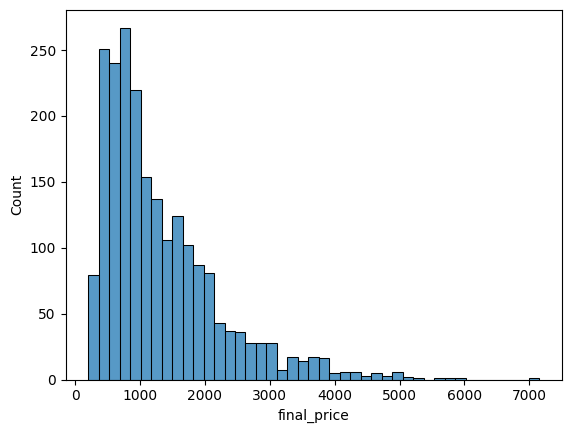

In [13]:
sns.histplot(df.final_price)

#### Question 1

In [14]:
df.isnull().sum()
## Rta: Es screen

ram            0
storage        0
screen         4
final_price    0
dtype: int64

#### Question 2

In [15]:
df.describe()
## Rta 16.00

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


## Dividir el dataset

In [16]:
n = len(df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n , n_val+n_test+n_train, n_val, n_test, n_train

(2160, 2160, 432, 432, 1296)

In [64]:
idx = np.arange(n)
np.random.seed(0)
np.random.shuffle(idx)

In [65]:
# Create shuffled datasets with correct size
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [66]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [67]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [68]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

#### Question 3

##### Reemplazo los null con 0 

In [69]:
## Preparo X
def prepare_X(df):
    df_num = df.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [70]:
### Defino el Modelo

def train_linear_regression_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [71]:
## Defino RMSE

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(565.6599190104985)

##### Reemplazo los null con mean

In [29]:
mean = df.screen.mean()

In [30]:
## Preparo X
def prepare_X(df):
    df_num = df.fillna(mean)
    # extracting the Numpy array
    X = df_num.values
    return X

In [31]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(599.6732181319123)

RTA Question 3: Es mejor opción reemplazar con 0

### Question 4

In [33]:
## Preparo X reemplazando null con 0
def prepare_X(df):
    df= df.fillna(0)
    # extracting the Numpy array
    X = df.values
    return X

In [35]:
# reg = regularized
# parameter r = short for regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [37]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",round(score,2))


reg parameter:  0 bias term:  676.8954853003995 rmse:  597.36
reg parameter:  0.01 bias term:  676.2736817205587 rmse:  597.36
reg parameter:  0.1 bias term:  670.7284836314063 rmse:  597.35
reg parameter:  1 bias term:  619.9030834108207 rmse:  597.21
reg parameter:  5 bias term:  463.7771697142356 rmse:  597.01
reg parameter:  10 bias term:  352.79713367679835 rmse:  597.06
reg parameter:  100 bias term:  66.92071440181994 rmse:  597.9


In [ ]:
Rta Question 4: el r que mejor RMSE da es el de 5

### Question 5

In [73]:
def split_dataset(s):
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    # Create shuffled datasets with correct size
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return df_train, df_val, df_test, y_train, y_val, y_test
    

In [44]:
### Defino el Modelo sin regularización

def train_linear_regression_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [75]:

 for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(s)
    X_train = prepare_X(df_train)
     
    w0, w = train_linear_regression_reg(X_train, y_train)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)

    print(round(score,2))

    

565.66
636.94
588.75
597.69
571.84
573.28
646.59
551.14
587.4
576.3


In [76]:
R = [565.66,
636.94,
588.75,
597.69,
571.84,
573.28,
646.59,
551.14,
587.4,
576.3]

In [77]:
np.std(R)

np.float64(28.932463928950146)

Rta question 5: el valor es 29.176

### Question 6

In [90]:
## Defino el modelo con regularización:

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [81]:
def split_dataset():
    idx = np.arange(n)
    np.random.seed(9)
    np.random.shuffle(idx)

    # Create shuffled datasets with correct size
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [82]:
df_full_train = pd.concat([df_train, df_val])

In [91]:
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
 
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)

print(round(score,2))

608.61


RTA Question 6: el valor es 608.61 